In [13]:
#1-5
import hashlib
import time

m = hashlib.sha256()
target_arr = [pow(2, 228), pow(2, 230), pow(2, 232), pow(2, 237), pow(2, 240)]
previous = '00000003ef809ab31c2339e3938349437161a40eb9d19162b0185bc5be78d2f8'
transaction = '14d65eb004b8fca9fa7873263ddfb0b0f3101be84ebb5f847ac6f9aaf2a17ebf'

def nonce(target):
    begin = time.perf_counter()
    i = 0
    nonce = 0
    pt = previous + transaction
    temp_hash = str(hex(0)) + pt
    #print(temp_hash)
    #print(int(temp_hash, 16))
    #print(int(target, 16))
    print('temp hash')
    print(temp_hash)
    print('target')
    print(target)
    while True:
        temp_hash = hex(i) + pt
        in_bytes = str.encode(temp_hash)
        final = hashlib.sha256(in_bytes).hexdigest()
        if int(final, 16) < target:
            break
        
        nonce = i
        i += 1
    end = time.perf_counter()
    print('nonce')
    print(nonce)
    print('end time')
    print(end)
    print('begin time')
    print(begin)
    times = end - begin
    print('time')
    print(times)

nonce(target_arr[4])

temp hash
0x000000003ef809ab31c2339e3938349437161a40eb9d19162b0185bc5be78d2f814d65eb004b8fca9fa7873263ddfb0b0f3101be84ebb5f847ac6f9aaf2a17ebf
target
1766847064778384329583297500742918515827483896875618958121606201292619776
nonce
234535
end time
4060.844228778
begin time
4060.429188693
time
0.4150400849998732


In [3]:
import energyusage
import time

def energy_usage_loop(arr):
    for target in arr:
        energy = energyusage.evaluate(nonce, target, pdf=True)
        print(energy)

print(energy_usage_loop(target_arr))

IndexError: tuple index out of range

In [21]:
#target_arr = [pow(2, 228), pow(2, 230), pow(2, 232), pow(2, 237), pow(2, 240)]
watts = [17.58, 17.61, 17.66, 17.57, 17.65] #average process watts
hashes = [70753223, 12510777, 12510777, 805182, 234535] #nonce values
seconds = [89.060622092, 15.844004646, 15.859061399, 1.025063544, 0.305944845] #process time in seconds

def watts_per_hash(watts, hashes):
    wph = []
    i = 0
    while i < len(watts):
        wph.append(watts[i] / hashes[i])
        i += 1
    return wph

watts_per_hash = watts_per_hash(watts, hashes)
print(watts_per_hash)

    
    
def joules(watts, secs):
    joules = []
    
    i = 0
    while i < len(watts):
        joules.append(watts[i] / secs[i])
        i += 1
    return joules

joules = joules(watts_per_hash, seconds) #joules per hash
print(joules)

[2.4846924641157333e-07, 1.4075864352789598e-06, 1.4115829896096782e-06, 2.1821153478344027e-05, 7.525529238706376e-05]
[2.7898889607452274e-09, 8.884031952327918e-08, 8.900797809501426e-08, 2.12876105155331e-05, 0.00024597666415024496]


In [30]:
#target_arr = [pow(2, 228), pow(2, 230), pow(2, 232), pow(2, 237), pow(2, 240)]
watts = [17.58, 17.61, 17.66, 17.57, 17.65] #average process watts
hashes = [70753223, 12510777, 12510777, 805182, 234535] #nonce values
seconds = [89.060622092, 15.844004646, 15.859061399, 1.025063544, 0.305944845] #process time in seconds

value=str('6,0865000000e-01')
value2=value.replace(',', '.')
float(value2)



def watts_per_hash(watts, hashes):
    wph = []
    i = 0
    while i < len(watts):
        wph.append(watts[i] / hashes[i])
        i += 1
    return wph

watts_per_hash = watts_per_hash(watts, hashes)
print(watts_per_hash)

    
    
def joules(watts, secs):
    joules = []
    
    i = 0
    while i < len(watts):
        joules.append(watts[i] / secs[i])
        i += 1
    return joules

joules = joules(watts_per_hash, seconds) #joules per hash
print(joules)

[2.4846924641157333e-07, 1.4075864352789598e-06, 1.4115829896096782e-06, 2.1821153478344027e-05, 7.525529238706376e-05]
[2.7898889607452274e-09, 8.884031952327918e-08, 8.900797809501426e-08, 2.12876105155331e-05, 0.00024597666415024496]


[4.31359147e+68 1.72543659e+69 6.90174635e+69 2.20855883e+71
 1.76684706e+72]


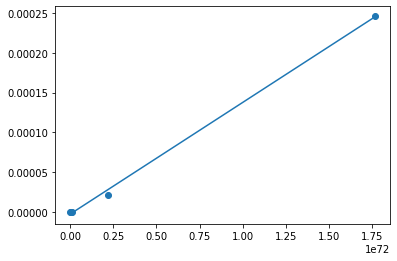

In [38]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(target_arr).astype(float)
y = np.array(joules).astype(float)

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y)

plt.plot(x, a*x+b)  

#add line of best fit to plot
plt.show()

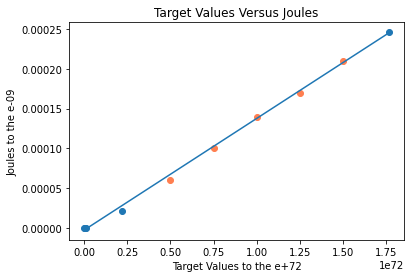

In [40]:
estimatex = [0.50e+72, 0.75e+72, 1.00e+72, 1.25e+72, 1.50e+72]
estimatey = [0.00006, 0.00010, 0.00014, 0.00017, 0.00021]


plt.scatter(estimatex, estimatey, c='coral')
#add points to plot
plt.scatter(x, y)

plt.plot(x, a*x+b)  
plt.title('Target Values Versus Joules')
plt.xlabel('Target Values to the e+72')
plt.ylabel('Joules to the e-09')

#add line of best fit to plot
plt.show()

In [46]:
hashes = 70753223
seconds = 92.13826791103929
hashes_per_seconds = 70753223 / 92.13826791103929
num_transactions = 2.2 * pow(10, 20) #hashes per second

print("hashes_per_seconds")
print(hashes_per_seconds)

print()

print("transactions")
print(num_transactions)

hashes_per_seconds
767902.6815254783

transactions
2.2000000000000003e+20


In [47]:
nodes = num_transactions / hashes_per_seconds
print('nodes')
print(nodes)

nodes
286494637006552.3


In [48]:
watts_per_hash = 0.000000250023946
total_energy = watts_per_hash * nodes

print('total energy in watts')
print(total_energy)

total energy in watts
71630519.65221582


In [51]:
antminer_hashes_per_second = 95 * pow(10, 12)
watts = 3250
num_transactions = 2.2 * pow(10, 20) #hashes per second

nodes = num_transactions / antminer_hashes_per_second
print('nodes antminer')
print(nodes)

total_energy_antminer = watts * nodes

print('total energy in watts antminer')
print(total_energy_antminer)

nodes antminer
2315789.473684211
total energy in watts antminer
7526315789.473685
